Desarrollo del EDA Y modelo de recomendación basado en Machine Learnig

1 Importe de librerias

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
import ast
import json

2 Importe de datos

In [196]:
df_games_complete = pd.read_csv("df_games_eda.csv", sep=',', encoding='utf-8-sig')
df_reviews = pd.read_csv("df_reviews.csv", sep=',', encoding='utf-8-sig')
df_items = pd.read_csv("df_items.csv", sep=',', encoding='utf-8-sig')

C:\Users\Angela\AppData\Local\Temp\ipykernel_19688\3281749198.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_games_complete = pd.read_csv("df_games_eda.csv", sep=',', encoding='utf-8-sig')


3 Desarrollo del EDA

DATA FRAME GAMES

a. Vista explratoria 

In [197]:
#Vista aleatoria de datos
df_games_complete.sample(5)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
82530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112782,"Strashiner Studios, Nusa Capital INA, Enterbrain","['Action', 'Adventure', 'Indie', 'RPG', 'Strat...",A Story of the End - Revere Demo,A Story of the End - Revere Demo,http://store.steampowered.com/app/432220/A_Sto...,2017-05-20,"['Action', 'Adventure', 'RPG', 'Indie', 'Strat...",http://steamcommunity.com/app/432220/reviews/?...,"['Single-player', 'Game demo']",NaN,False,432220.0,Darrel Wijaya


In [198]:
#Vista general de la data
df_games_complete.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24064 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  object 
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(1), object(12)
memory usage: 11.9+ MB


In [199]:
#Se verifica el tamaño de la base de datos 
df_games_complete.shape

(120445, 13)

In [200]:
#se eliminan las columnas inecesarias, (se realiza un dropna calculando el 20% de la longitud del DataFrame pero no elimino ninguna, 
# entonces se procese solo a eliminar las columnas "url" y "reviews_url" por el momento)
df_games_complete.drop(columns=["url", "reviews_url"], inplace=True)
df_games_complete.columns

Index(['publisher', 'genres', 'app_name', 'title', 'release_date', 'tags',
       'specs', 'price', 'early_access', 'id', 'developer'],
      dtype='object')

In [201]:
#Descripción de variables numericas, falta price
df_games_complete.describe()

,id
count,3.213300e+04
mean,4.517574e+05
std,1.827140e+05
min,1.000000e+01
25%,3.292800e+05
50%,4.520600e+05
75%,5.934000e+05
max,2.028850e+06


In [202]:
# Descripcion de las columnas no numericas 
df_games_complete.describe(include=['O'])

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,developer
count,24064,28852,32133,30085,30068,31972,31465,30758,32135,28836
unique,8236,883,32094,30054,3582,15395,4649,162,2,10992
top,Ubisoft,['Action'],Soundtrack,Soundtrack,2012-10-16,"['Casual', 'Simulation']",['Single-player'],4.99,False,Ubisoft - San Francisco
freq,385,1880,3,3,100,1292,2794,4278,30188,1259


B. Transformación y graficación

In [203]:
#Como se vio en la infomación price es un object, se cambia por float 

def convert_price(price):
    if isinstance(price, str):  # Verificar si el precio es una cadena
        if price.strip() == '':  # Verificar si la cadena está en blanco después de quitar espacios
            return np.nan
        elif price.lower() == 'free to use' or price.lower() == 'free to play':
            return 0  # Si es gratuito, asignar 0
        else:
            try:
                return float(price)  # Convertir a número si es posible
            except ValueError:
                return np.nan  # Si no se puede convertir, asignar NaN
    else:
        return price  # Mantener el valor original si no es una cadena

In [204]:
#Aplicación de la funcion
df_games_complete['price'] = df_games_complete['price'].apply(convert_price) 

In [205]:
#verificamos nuevamente las variables númericas
df_games_complete.describe()

,price,id
count,29831.000000,3.213300e+04
mean,9.142393,4.517574e+05
std,16.070487,1.827140e+05
min,0.000000,1.000000e+01
25%,2.990000,3.292800e+05
50%,4.990000,4.520600e+05
75%,9.990000,5.934000e+05
max,995.000000,2.028850e+06


In [206]:
#Se Verifica cuantos valores tiene 'early_access' 
unique_early_access_values = df_games_complete['early_access'].unique()
print(unique_early_access_values)

[nan False True]


In [207]:
# Se Converte la columna 'early_access' a valores booleanos
df_games_complete['early_access'] = df_games_complete['early_access'].astype(bool)

In [208]:
# Se Convertir la columna 'release_date' a tipo de dato fecha
df_games_complete['release_date'] = pd.to_datetime(df_games_complete['release_date'], errors='coerce')

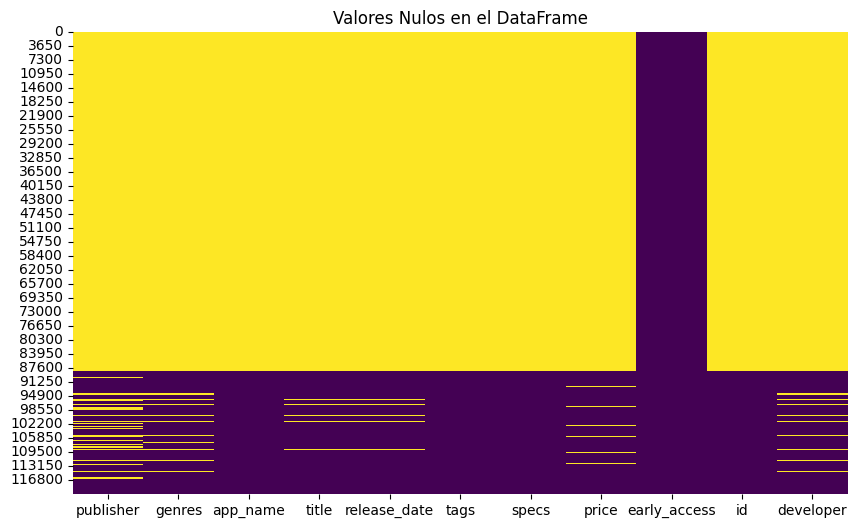

In [209]:
# Se grafica como se ven los datos
plt.figure(figsize=(10, 6))
sns.heatmap(df_games_complete.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Nulos en el DataFrame')
plt.show()

In [210]:
#Como se visualiza muchos datos nulo se procede hacer una limpieza para las filas que cumplen con minimo 5 columnas nulas

# Definir la cantidad mínima de valores no nulos requeridos en una fila
min_non_null_count = 5

# Eliminar filas que tengan al menos min_non_null_count valores NaN, NaT o []
df_games = df_games_complete.dropna(thresh=len(df_games_complete.columns) - min_non_null_count + 1)

df_games.reset_index(drop=True, inplace=True)

In [211]:
# Se hace control de la data aleatoria
df_games.sample(3)

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer
25002,Mastiff,"['Action', 'Adventure', 'RPG']",Gurumin: A Monstrous Adventure,Gurumin: A Monstrous Adventure,2015-03-30,"['Action', 'RPG', 'Adventure', 'Cute', 'Female...","['Single-player', 'Steam Achievements', 'Full ...",9.99,False,322290.0,"Nihon Falcom,Mastiff"
1768,Warner Bros. Interactive Entertainment,"['Action', 'Adventure']",Batman: Arkham Origins - Initiation,Batman: Arkham Origins - Initiation,2013-12-03,"['Action', 'Adventure', 'Batman']","['Single-player', 'Multi-player', 'Downloadabl...",6.99,False,237619.0,"WB Games Montreal,Splash Damage"
6387,Persona and Pixel studio,"['Indie', 'Simulation', 'Strategy']",Earth Space Colonies,Earth Space Colonies,2016-07-01,"['Simulation', 'Strategy', 'Indie', 'Survival'...","['Single-player', 'Steam Achievements', 'Steam...",9.99,False,437870.0,Persona and Pixel studio


In [212]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30049 entries, 0 to 30048
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publisher     24064 non-null  object        
 1   genres        28851 non-null  object        
 2   app_name      30049 non-null  object        
 3   title         30049 non-null  object        
 4   release_date  29746 non-null  datetime64[ns]
 5   tags          29896 non-null  object        
 6   specs         29415 non-null  object        
 7   price         28087 non-null  float64       
 8   early_access  30049 non-null  bool          
 9   id            30048 non-null  float64       
 10  developer     28836 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(7)
memory usage: 2.3+ MB


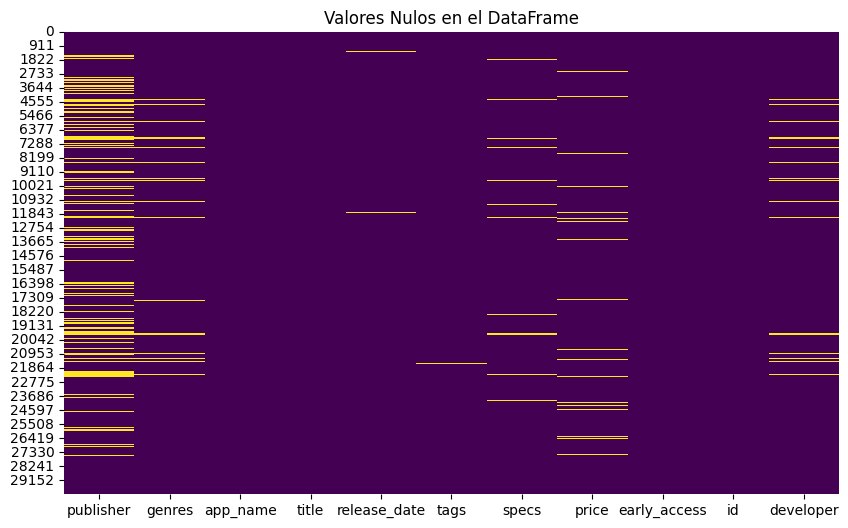

In [213]:
# Verifico como se ven mis datos nuevamente por grafica
plt.figure(figsize=(10, 6))
sns.heatmap(df_games.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Nulos en el DataFrame')
plt.show()

In [214]:
#Verifico nuevamente el tamaño de mi base de datos
df_games.shape

(30049, 11)

In [215]:
#Se realiza una transformacion de los datos de la columna genres

# Se crea una lista vacía para almacenar los géneros individuales
generos_individuales = []

# Se Itera a través de las listas de géneros en la columna 'genres'
for genre_str in df_games['genres']:
    try:
        # Se interpreta la cadena como una lista usando ast.literal_eval
        genre_list = ast.literal_eval(genre_str)
        if isinstance(genre_list, list):
            generos_individuales.extend(genre_list)
    except (SyntaxError, ValueError):
        # Manejo de errores en la interpretación de cadena
        pass

# se crea un DataFrame con los géneros individuales
df_generos = pd.DataFrame({'genre': generos_individuales})

# se cuenta la frecuencia de cada género
conteo_generos = df_generos['genre'].value_counts()

In [216]:
# verificamos el conteo
conteo_generos

genre
Indie                        15857
Action                       11320
Casual                        8282
Adventure                     8243
Strategy                      6957
Simulation                    6699
RPG                           5479
Free to Play                  2031
Early Access                  1462
Sports                        1257
Massively Multiplayer         1108
Racing                        1083
Design &amp; Illustration      460
Utilities                      340
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64

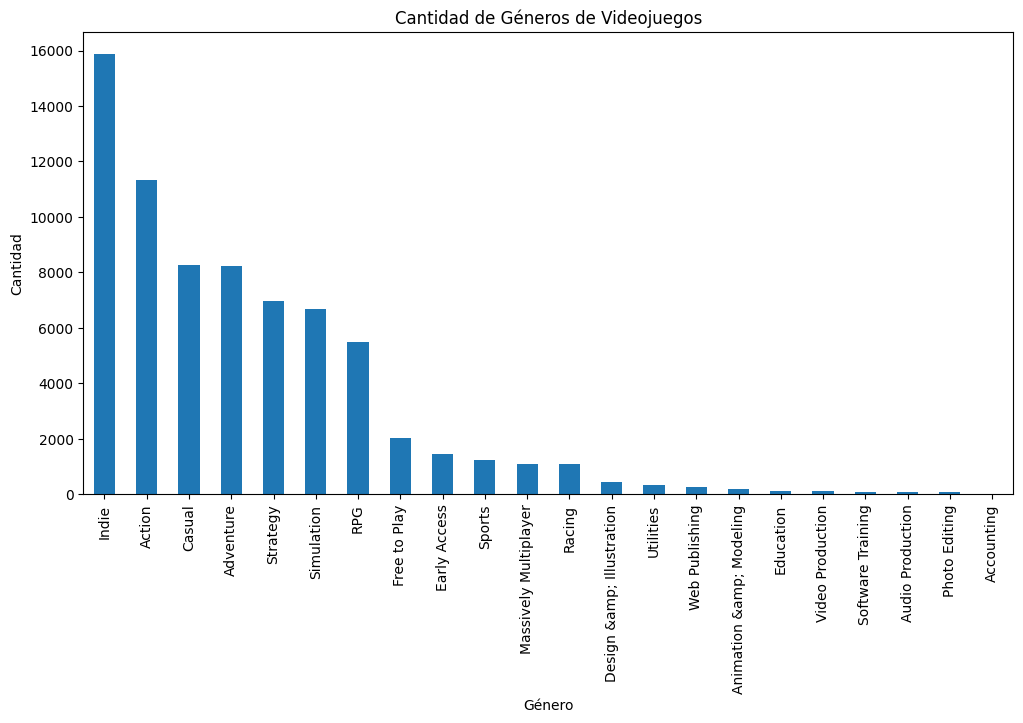

In [217]:
#Se grafica la cantidad de juegos por genero

plt.figure(figsize=(12, 6))
conteo_generos.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Cantidad de Géneros de Videojuegos')
plt.xticks(rotation=90)
plt.show()

C:\Users\Angela\AppData\Local\Temp\ipykernel_19688\3406241636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games['price'] = pd.to_numeric(df_games['price'], errors='coerce')  # Convertir a numérico


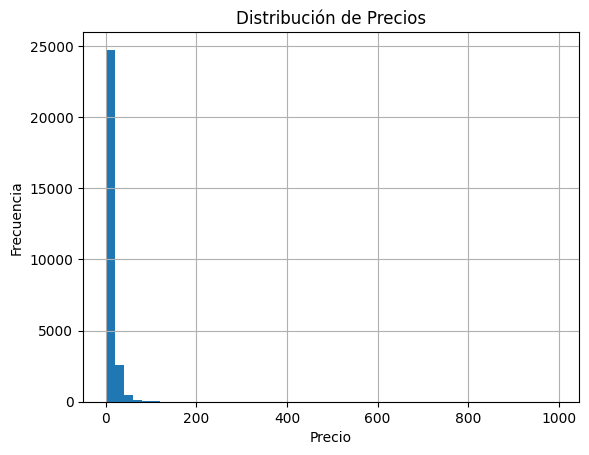

In [218]:
# Grafico de distribución del precio de los juegos

df_games['price'] = pd.to_numeric(df_games['price'], errors='coerce')  # Convertir a numérico
df_games['price'].hist(bins=50)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios')
plt.show()

In [219]:
#Se verifica outliers
# Se calcula el IQR (Rango Intercuartil)
Q1 = df_games['price'].quantile(0.25)
Q3 = df_games['price'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

2.99
9.99
7.0


In [220]:
#Se defiene el umbral de outliers
umbral_superior = Q3 + 1.5 * IQR
umbral_inferior = Q1 - 1.5 * IQR
print(umbral_superior)
print(umbral_inferior)

20.490000000000002
-7.51


In [221]:
#Se identifican los outliers
outliers_superiores = df_games[df_games['price'] > umbral_superior]
outliers_inferiores = df_games[df_games['price'] < umbral_inferior]
print(outliers_superiores)
print(outliers_inferiores)

                              publisher   
7                Poppermost Productions  \
16               Poppermost Productions   
49                               SimBin   
223                              NCsoft   
301             Dovetail Games - Trains   
...                                 ...   
29855                               NaN   
29873  Firedog Creative Company Limited   
29893                 CarX Technologies   
29991                  DreamInCode B.V.   
30014                        Koch Media   

                                                  genres   
7      ['Free to Play', 'Indie', 'Simulation', 'Sports']  \
16     ['Free to Play', 'Indie', 'Simulation', 'Sports']   
49                                            ['Racing']   
223                     ['Massively Multiplayer', 'RPG']   
301                                       ['Simulation']   
...                                                  ...   
29855  ['Animation &amp; Modeling', 'Design &amp; Ill...   
298

In [222]:
#No se eliminara ningun valor ya que se puede analizar que en el caso de los juegos de precios altos como los outlier, podrian ser juegos premium
# o ediciones especiales, mientras que lo valores bajos son lo gratis o de oferta

In [223]:
df_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'release_date', 'tags',
       'specs', 'price', 'early_access', 'id', 'developer'],
      dtype='object')

In [224]:
#se eliminaran varias columnas para nuestro analisis de modelado

df_games.drop( ['publisher','release_date','price','early_access','id','developer','app_name', 'tags'], axis=1, inplace=True)

C:\Users\Angela\AppData\Local\Temp\ipykernel_19688\1353860611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games.drop( ['publisher','release_date','price','early_access','id','developer','app_name', 'tags'], axis=1, inplace=True)


In [225]:
# Visualizamos como queda el df 
df_games

,genres,title,specs
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,['Single-player']
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,"['Single-player', 'Multi-player', 'Online Mult..."
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,"['Single-player', 'Multi-player', 'Online Mult..."
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,['Single-player']
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,"['Single-player', 'Steam Achievements']"
...,...,...,...
30044,"['Action', 'Adventure', 'Casual', 'Indie']",Kebab it Up!,"['Single-player', 'Steam Achievements', 'Steam..."
30045,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,"['Single-player', 'Steam Achievements']"
30046,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,"['Single-player', 'Steam Achievements', 'Steam..."
30047,"['Indie', 'Racing', 'Simulation']",Russian Roads,"['Single-player', 'Steam Achievements', 'Steam..."


DATA FRAME REVIEWS

In [226]:
# Visulización del df_reviews
df_reviews

,user_id_reviews,funny,posted,last_edited,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,NaN,"November 05, 2011",NaN,1250,No ratings yet,True,1
1,76561197970982479,NaN,"July 15, 2011",NaN,22200,No ratings yet,True,2
2,76561197970982479,NaN,"April 21, 2011",NaN,43110,No ratings yet,True,1
3,js41637,NaN,"June 24, 2014",NaN,251610,15 of 20 people (75%) found this review helpful,True,1
4,js41637,NaN,"September 08, 2013",NaN,227300,0 of 1 people (0%) found this review helpful,True,1
...,...,...,...,...,...,...,...,...
59300,76561198312638244,NaN,NaN,NaN,70,No ratings yet,True,2
59301,76561198312638244,NaN,NaN,NaN,362890,No ratings yet,True,1
59302,LydiaMorley,1 person found this review funny,NaN,NaN,273110,1 of 2 people (50%) found this review helpful,True,1
59303,LydiaMorley,NaN,NaN,NaN,730,No ratings yet,True,2


In [227]:
# Vista general de la data
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id_reviews     59305 non-null  object
 1   funny               8151 non-null   object
 2   posted              49186 non-null  object
 3   last_edited         4277 non-null   object
 4   item_id             59305 non-null  int64 
 5   helpful             59305 non-null  object
 6   recommend           59305 non-null  bool  
 7   sentiment_analysis  59305 non-null  int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 3.2+ MB


In [228]:
# Se verifica el tamaña de la base de datos
df_reviews.shape

(59305, 8)

In [229]:
#Se elimina las columnas funny, posted, last_edited, helpful
df_reviews.drop(['funny', 'posted', 'last_edited','helpful'], axis=1, inplace=True)

In [230]:
# Descripcion de variables numericas
df_reviews.describe()

,item_id,sentiment_analysis
count,59305.000000,59305.000000
mean,169935.176511,1.209628
std,132029.464174,0.584085
min,10.000000,0.000000
25%,8930.000000,1.000000
50%,218230.000000,1.000000
75%,261760.000000,2.000000
max,527340.000000,2.000000


In [231]:
# Descripcion de las columnas no numericas 
df_reviews.describe(include=['O'])

,user_id_reviews
count,59305
unique,25458
top,76561198094665607
freq,20


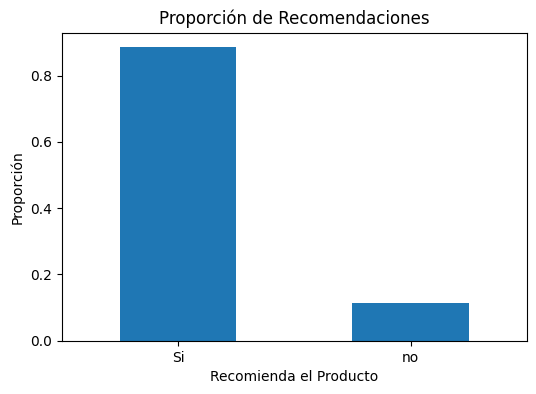

Proporción de recomendaciones:
recommend
True     0.884799
False    0.115201
Name: proportion, dtype: float64


In [232]:
# Se calcula la proporción de revisiones que recomiendan el producto
recommendation_counts = df_reviews['recommend'].value_counts(normalize=True)

# Visualizar la proporción de recomendaciones
plt.figure(figsize=(6, 4))
recommendation_counts.plot(kind='bar', rot=0)
plt.title('Proporción de Recomendaciones')
plt.xlabel('Recomienda el Producto')
plt.ylabel('Proporción')
plt.xticks([0, 1], ['Si', 'no'])  # Etiquetas de los ejes x
plt.show()

# Imprimir resultados
print("Proporción de recomendaciones:")
print(recommendation_counts)

In [233]:
#Control de la data
df_reviews.sample(3)

,user_id_reviews,item_id,recommend,sentiment_analysis
35644,76561198085905659,550,True,1
7694,snakrobotza3,413150,True,1
11811,breadedaustralia,261640,False,1


DATAFRAME ITEMS

In [234]:
# Se visualiza el df
df_items

,user_id_items,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0,0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7,0
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0,0
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...,...,...
5153204,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,346330,BrainBread 2,0,0
5153205,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,373330,All Is Dust,0,0
5153206,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,521570,You Have 10 Seconds 2,4,4


In [235]:
# Vista general de la data
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id_items     object
 1   items_count       int64 
 2   steam_id          int64 
 3   user_url          object
 4   item_id           int64 
 5   item_name         object
 6   playtime_forever  int64 
 7   playtime_2weeks   int64 
dtypes: int64(5), object(3)
memory usage: 314.5+ MB


In [236]:
# Se verifica el tamaño de la base de datos
df_items.shape

(5153209, 8)

In [237]:
#Se elimina las columnas items_count, steam_id, user_url, playtime_2week
df_items.drop(['items_count', 'steam_id', 'user_url','playtime_2weeks'], axis=1, inplace=True)

In [238]:
# Se imprimen los primeros 3 registros para hacer un control de la data
df_items.sample(3)

,user_id_items,item_id,item_name,playtime_forever
4791134,76561198072517781,273110,Counter-Strike Nexon: Zombies,0
1152237,harrybyrne,21120,F.E.A.R.: Perseus Mandate,0
4567000,76561198059739464,251670,Battle Nations,1


In [239]:
#Control de visualización de la data con los cambios
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id_items     object
 1   item_id           int64 
 2   item_name         object
 3   playtime_forever  int64 
dtypes: int64(2), object(2)
memory usage: 157.3+ MB


In [240]:
# Descripcion de variables numericas
df_items.describe()

,item_id,playtime_forever
count,5.153209e+06,5.153209e+06
mean,1.784481e+05,9.914951e+02
std,1.318598e+05,5.418204e+03
min,1.000000e+01,0.000000e+00
25%,3.446000e+04,0.000000e+00
50%,2.144200e+05,3.400000e+01
75%,2.664300e+05,3.550000e+02
max,5.307200e+05,6.427730e+05


In [241]:
# Descripcion de las columnas no numericas 
df_items.describe(include=['O'])

,user_id_items,item_name
count,5153209,5153209
unique,70912,10947
top,phrostb,Dota 2 Test
freq,7762,49571


In [242]:
#Grafica de los 10 juegos mas top
# Se agrupa los datos por nombre de juego y calcula la suma de las horas jugadas para cada juego.
top_games = df_items.groupby('item_name')['playtime_forever'].sum().reset_index()

In [243]:
#Se Ordena el df 'top_games' descendentemente basado en las horas jugadas ('playtime_forever').
top_games = top_games.sort_values(by='playtime_forever', ascending=False)

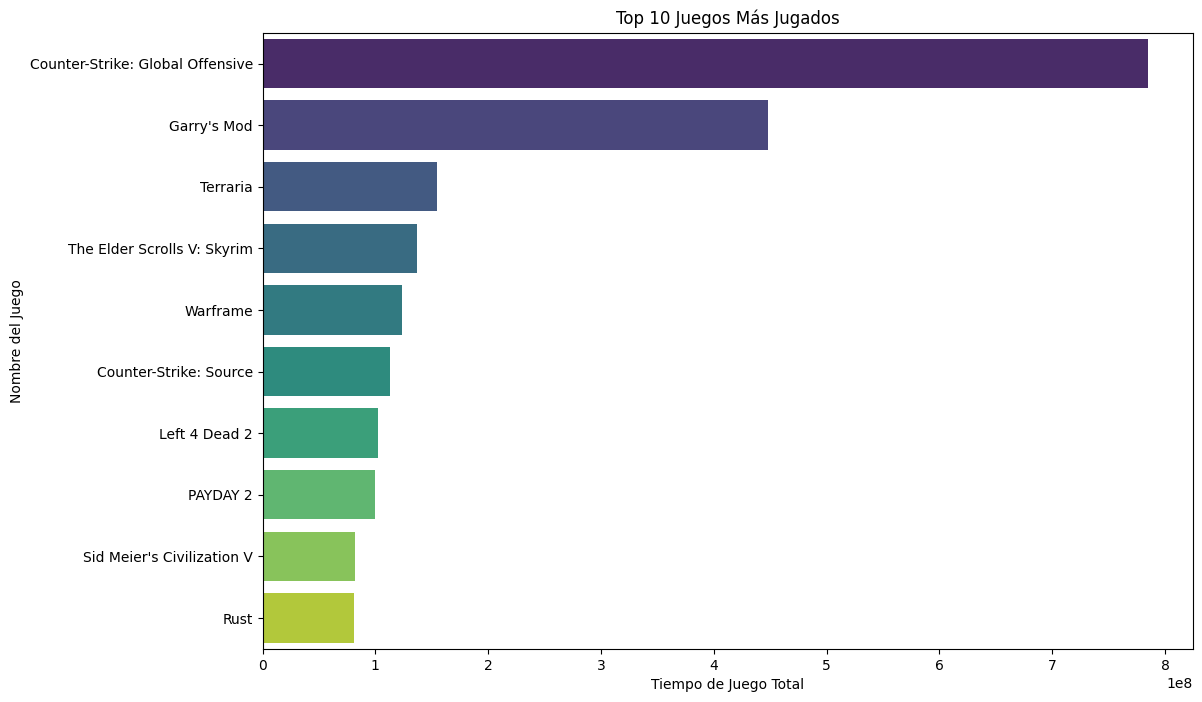

In [244]:
plt.figure(figsize=(12, 8))
sns.barplot(x='playtime_forever', y='item_name', data=top_games.head(10), palette="viridis")
plt.title('Top 10 Juegos Más Jugados')
plt.xlabel('Tiempo de Juego Total')
plt.ylabel('Nombre del Juego')
plt.show()

MACHINE LEARNING

Desarrollo del modelo Machine Learning

Sistema de recomendación item-item por id juego

In [276]:
# Eliminar filas con valores de género nulos por precaución
df_games = df_games.dropna(subset=['genres'])  

# Se convierte la lista a cadena
genres_list = df_games['genres'].apply(lambda x: ' '.join(x))  

# Codificar los géneros en la columna 'genres_list' en formato one-hot
df_encoded = pd.get_dummies(genres_list.str.split(expand=True).stack(), prefix='genre').groupby(level=0).sum()

In [277]:
# Se imprime para verificar la data
df_encoded.head(3)

,genre_&,genre_',"genre_,",genre_;,genre_A,genre_C,genre_D,genre_E,genre_F,genre_G,...,genre_n,genre_o,genre_p,genre_r,genre_s,genre_t,genre_u,genre_v,genre_w,genre_y
0,0,10,4,0,1,1,0,0,0,0,...,3,2,0,1,1,4,2,0,0,1
1,0,8,3,0,0,0,0,0,1,1,...,1,1,0,2,0,3,0,0,0,2
2,0,10,4,0,0,1,0,0,1,0,...,2,3,1,2,2,3,2,0,0,1


In [278]:
# Se importa la función cosine_similarity del módulo sklearn.metrics.pairwise
from sklearn.metrics.pairwise import cosine_similarity 

# Se calcula la matriz de similitud de coseno entre dos conjuntos de datos codificados en formato one-hot.
similarity_matrix = cosine_similarity(df_encoded, df_encoded)

In [279]:
def find_similar_games(target_game_name, similarity_matrix, df_games):
    # Se encuentra el índice del juego
    game_index = df_games[df_games['title'] == target_game_name].index[0]

    # Se calcula la similitud de coseno entre el juego seleccionado y todos los otros juegos
    similar_games_indices = similarity_matrix[game_index].argsort()[::-1][1:]

    # halla los títulos de los juegos similares a partir de los indices calculados
    similar_games_name = df_games['title'].iloc[similar_games_indices]
    
    return similar_games_name


In [280]:
# Se pone un nombre de juego y da el top 5
target_game_name_1 = "Madrobot X"
top_similar_games_1 = find_similar_games(target_game_name_1, similarity_matrix, df_games)
top_similar_games_1.head(5)

13599    Friday the 13th: The Game - Costume Party Coun...
18978                                          Apokalypsis
28458                                  Hitman: Absolution™
13579                     Wolfenstein II: The New Colossus
16433                     Battlezone - Classic Camo (Skin)
Name: title, dtype: object

Sistema de recomendación user-item por nombre de juego

In [259]:
#Se realiza un muestreo aleatorio de los datos, para mejor rendimiento
sampled_reviews = df_reviews.sample(frac=0.1)  # muestreo del 10% de las filas aleatoriamente
sampled_items = df_items.sample(frac=0.1)      # muestreo del 10% de las filas aleatoriamente

In [260]:
# Combina los df muestreados
df_merged = pd.merge(sampled_reviews, sampled_items, on='item_id', how='inner')

In [252]:
## Proceso que realice para la API

# Guarda el DataFrame en un archivo CSV
# df_merged.to_csv('df_games_api.csv', index=False)

In [253]:
## Proceso que realice para la API

# Se carga el archivo
##bloque la siguiente linea de codigo para que no me genere otr df, ya que cuando le hago el sampleo siempre me va generar diferentes
# df_games_api= pd.read_csv("df_games_api.csv", sep=',', encoding='utf-8-sig')

In [263]:
#Se crea una matriz de Usuario item
user_item_matrix = df_merged.pivot_table(index='user_id_reviews', columns='item_name', values='sentiment_analysis', fill_value=0)

In [264]:
#Se calcula la similitud entre usuarios
user_similarity = cosine_similarity(user_item_matrix)

In [265]:
def recomendacion_usuario(id_usuario):
    # Halla el índice del usuario en la matriz
    index = user_item_matrix.index.get_loc(id_usuario)
    
    # Se calcula la similitud del usuario con todos los demás usuarios
    user_similarities = user_similarity[index]
    
    # Se ordena los usuarios similares en orden descendente a la similitud
    similar_users_indices = user_similarities.argsort()[::-1]
    
    # Encuentra los ítems que el usuario no ha valorado
    items_not_rated_by_user = user_item_matrix.loc[id_usuario] == 0
    recommended_items = user_item_matrix.columns[items_not_rated_by_user]
    
    # Almacena las recomendaciones de los ítems valorados por los usuarios similares
    recommendations = []
    for user_idx in similar_users_indices:
        similar_user_id = user_item_matrix.index[user_idx]
        rated_items = user_item_matrix.loc[similar_user_id]
        top_items = rated_items.index  # Recomienda todos los ítems valorados por usuarios similares
        recommendations.extend(top_items)
        
        # Se limita la cantidad de recomendaciones
        if len(recommendations) >= 5:
            break
    
    return recommendations[:5]  # Devuelve las primeras 5 recomendaciones

In [270]:
df_merged.sample(5)

,user_id_reviews,item_id,recommend,sentiment_analysis,user_id_items,item_name,playtime_forever
1304773,LerKxA,730,True,2,moondos,Counter-Strike: Global Offensive,150
4570649,zayzayem,550,True,1,76561198067645703,Left 4 Dead 2,862
5882673,humanstapler,200210,True,2,76561198102177001,Realm of the Mad God,522
6454526,Dolanito500,346900,True,1,TehRealNurD,AdVenture Capitalist,0
1157791,iwannakilmyselfthx,730,True,1,76561198048203900,Counter-Strike: Global Offensive,6603


In [268]:
#Se llama a la función recomendacion_usuario para un usuario específico
usuario_id = 'GameTaj' # Introducción del usuario que queremos verificar 
recomendaciones = recomendacion_usuario(usuario_id)

# Imprimimos las recomendaciones
print(f'Recomendaciones para el usuario {usuario_id}:')
for i, item in enumerate(recomendaciones, start=1):
    print(f'{i}. {item}')


Recomendaciones para el usuario GameTaj:
1. ! That Bastard Is Trying To Steal Our Gold !
2. 100% Orange Juice
3. 12 Labours of Hercules
4. 16bit Trader
5. 3089 -- Futuristic Action RPG
